#  01 - Preparación de Datos 

Este notebook prepara los datos del dataset MURA (Musculoskeletal Radiographs) para una **clasificación binaria**:

- `0` → Normal  
- `1` → Abnormal  

 Usamos imágenes organizadas por carpetas (`positive` / `negative`) para generar etiquetas.  
El dataset puede ser el conjunto reducido (`src/data_sample`) o el conjunto completo que se puede descargar en: 

In [1]:
import os
from pathlib import Path
import random
from PIL import Image
import matplotlib.pyplot as plt

import torch
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [4]:
# Cambia esto si quieres usar la data completa
USE_SAMPLE = True
DATA_DIR = "/Users/alvarosanchez/ONLINE_DS_THEBRIDGE_ALVAROSMMS-1/ML_Clasificacion_Radiografias_Muscoesqueleticas/src/data_sample"

# Tamaño estándar para modelos preentrenados
IMAGE_SIZE = 224
BATCH_SIZE = 16

In [5]:
# Transformaciones (resize + normalización para modelos preentrenados)
transform = transforms.Compose([
    transforms.Resize((IMAGE_SIZE, IMAGE_SIZE)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406],  # Imagenet
                         std=[0.229, 0.224, 0.225])
])

In [6]:
#  Usamos ImageFolder para que infiera etiquetas desde nombres de carpeta
# Las carpetas deben ser: .../positive/ o .../negative/

train_dir = os.path.join(DATA_DIR, "train")
valid_dir = os.path.join(DATA_DIR, "valid")

train_dataset = datasets.ImageFolder(train_dir, transform=transform)
valid_dataset = datasets.ImageFolder(valid_dir, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)
valid_loader = DataLoader(valid_dataset, batch_size=BATCH_SIZE)

class_names = train_dataset.classes
print(f"Etiquetas detectadas: {class_names}")

Etiquetas detectadas: ['XR_ELBOW', 'XR_WRIST']


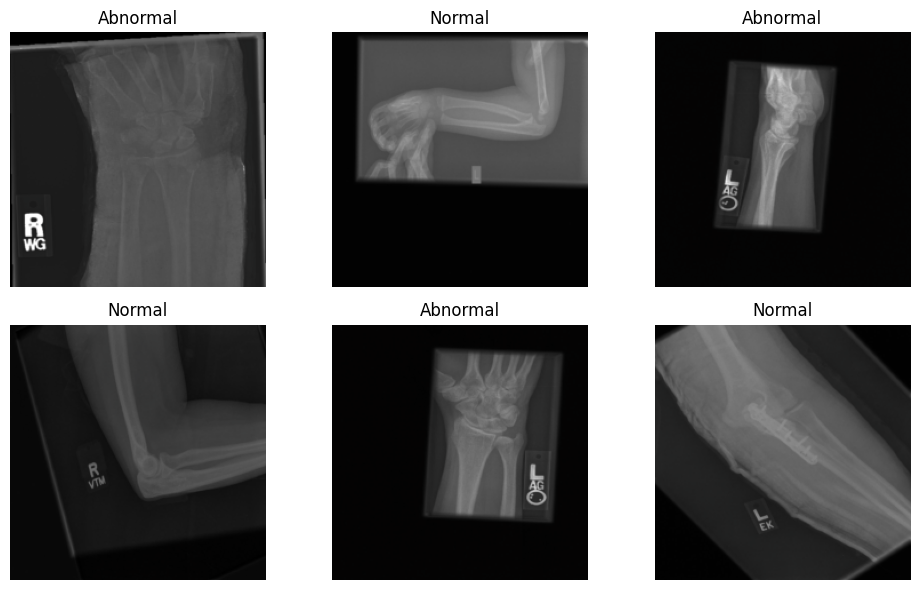

In [ ]:
# Mostrar imágenes con su etiqueta
def imshow(img, title):
    img = img * torch.tensor([0.229, 0.224, 0.225]).view(3,1,1) + torch.tensor([0.485, 0.456, 0.406]).view(3,1,1)
    img = img.clamp(0, 1)
    plt.imshow(img.permute(1, 2, 0))
    plt.title(title)
    plt.axis('off')

# Mostrar un batch
dataiter = iter(train_loader)
images, labels = next(dataiter)

plt.figure(figsize=(10,6))
for i in range(6):
    plt.subplot(2,3,i+1)
    imshow(images[i], title="Abnormal" if labels[i].item() == 1 else "Normal")
plt.tight_layout()
plt.show()